# CS 109A/AC 209A/STAT 121A Data Science: Homework 8
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 16th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW8.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [11]:
import numpy as np
import pandas as pd
import scipy as sp

import pydotplus
from IPython.display import Image

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from inspect import getmembers

from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.cross_validation import KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
import StringIO
from matplotlib import rcParams

from sklearn import linear_model
from sklearn import svm
import matplotlib

%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Bassily, Hany

### Part (b): Course Number

CS E-109A

### Part (c): Who did you work with?

None

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Processing Revisited

In this problem we revisit applications of classification, with the purpose of comparing the performance of support vector classifiers with other classifiers we have learned. We'll begin with the aeriel vegetation detection problem from Homework #7.

The data is contained in `dataset_1.txt` and `dataset_2.txt` (you are encouraged to use the datasets from Homework #7 as well). The first two columns of the data contains the latitude and longitudes of randomly sampled locations in the satellite image, and the last column contains a label indicating whether the location contains vegetation (1 denotes the presence of vegetation and 0 denotes otherwise). The task is to, again, identify the vegetation regions in the image.

- Compare the result of using support vector classifiers to perform classification against results obtained from other models you have learned. Which model is more appropriate for the general task of vegetation detection in aerial images (do not restrict yourself to which model performs better on just these two datasets)? Which model is more appropriate for other types of image processing (hand-writting digit classification for example) Your comparison should be both **qualitative** and quantitative.

    **Hint:** For your analysis, it's vital to consider the differences between the ways in which each of these models perform classification. These differences can be gauged by looking at the differences between the decision boundaries drawn by the models and **how** these boundaries are determined. 
    
- Are there any obvious draw backs to support vector classifiers as we have presented them to you? What might be some intuitive ways to address these draw backs?

Again, we provide you with a function `plot_decision_boundary` to visualize the decision boundary of a classifier.

In [12]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='white')
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

---

<font color = 'blue'>
### Solution:
</font>
<br>

The solution for this problem will follow the following startegy:

 1. Load data and make a data scatter for all vegetation data sets (including HW7)
 2.	Visualize decision boundaries for all models and all data
 3.	For support vector machine:
  -	Identify the support vectors for both data sets(training) and fit a svc model only to the support vectors
  -	Parameter tuning for svc and fit test data
 4.	Quantitative comparison between SVM and other linear models (accuracy, false positives, false negatives)
 5.	Comparison between different methods
  -	Data characteristics: Number of features, class labels, availability of training data, categorical data,     decision boundary shape, class separability
  -	Suitability of each model: Number of features limitations, size of data, Training cost, prediction cost, class separability, classification cost, number of labels, handling of categorical predictors, interpretability
 6. Shortcomings of SVM
 7. Test with other kernels
 
<br>


**1. Load Datasets and Visualize:**


<br>


In [13]:
# Opening Data sets:
# ------------------

# First file
sat_img_1 = pd.read_csv('datasets/dataset_1_train.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_1_train.txt'

# Second File
sat_img_2 = pd.read_csv('datasets/dataset_2_train.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_2_train.txt'

# Third file HW7
sat_img_3 = pd.read_csv('datasets/dataset_17.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_17.txt'

# Fourth file HW7
sat_img_4 = pd.read_csv('datasets/dataset_27.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_27.txt'

# Fifth file HW7
sat_img_5 = pd.read_csv('datasets/dataset_37.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_37.txt'

# Sixth file HW7
sat_img_6 = pd.read_csv('datasets/dataset_47.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_47.txt'

# First file Test
sat_img_1_test = pd.read_csv('datasets/dataset_1_test.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_1_test.txt'

# Second file Test
sat_img_2_test = pd.read_csv('datasets/dataset_2_test.txt', delimiter=',', header=None)
print 'file opened: datasets/dataset_2_test.txt'

# Make a list of the four dataframes so we can iterate through them later
sat_images = [sat_img_1, sat_img_2, sat_img_3, sat_img_4, sat_img_5, sat_img_6, sat_img_1_test, sat_img_2_test]

# Sanity check
print '\n Sample from the fourth file: \n'
sat_img_1.head()

file opened: datasets/dataset_1_train.txt
file opened: datasets/dataset_2_train.txt
file opened: datasets/dataset_17.txt
file opened: datasets/dataset_27.txt
file opened: datasets/dataset_37.txt
file opened: datasets/dataset_47.txt
file opened: datasets/dataset_1_test.txt
file opened: datasets/dataset_2_test.txt

 Sample from the fourth file: 



,0,1,2
0,0.678422,0.332760,0.0
1,0.446285,0.233264,0.0
2,0.502779,0.956748,1.0
3,0.615255,0.953660,1.0
4,0.043501,0.395151,1.0


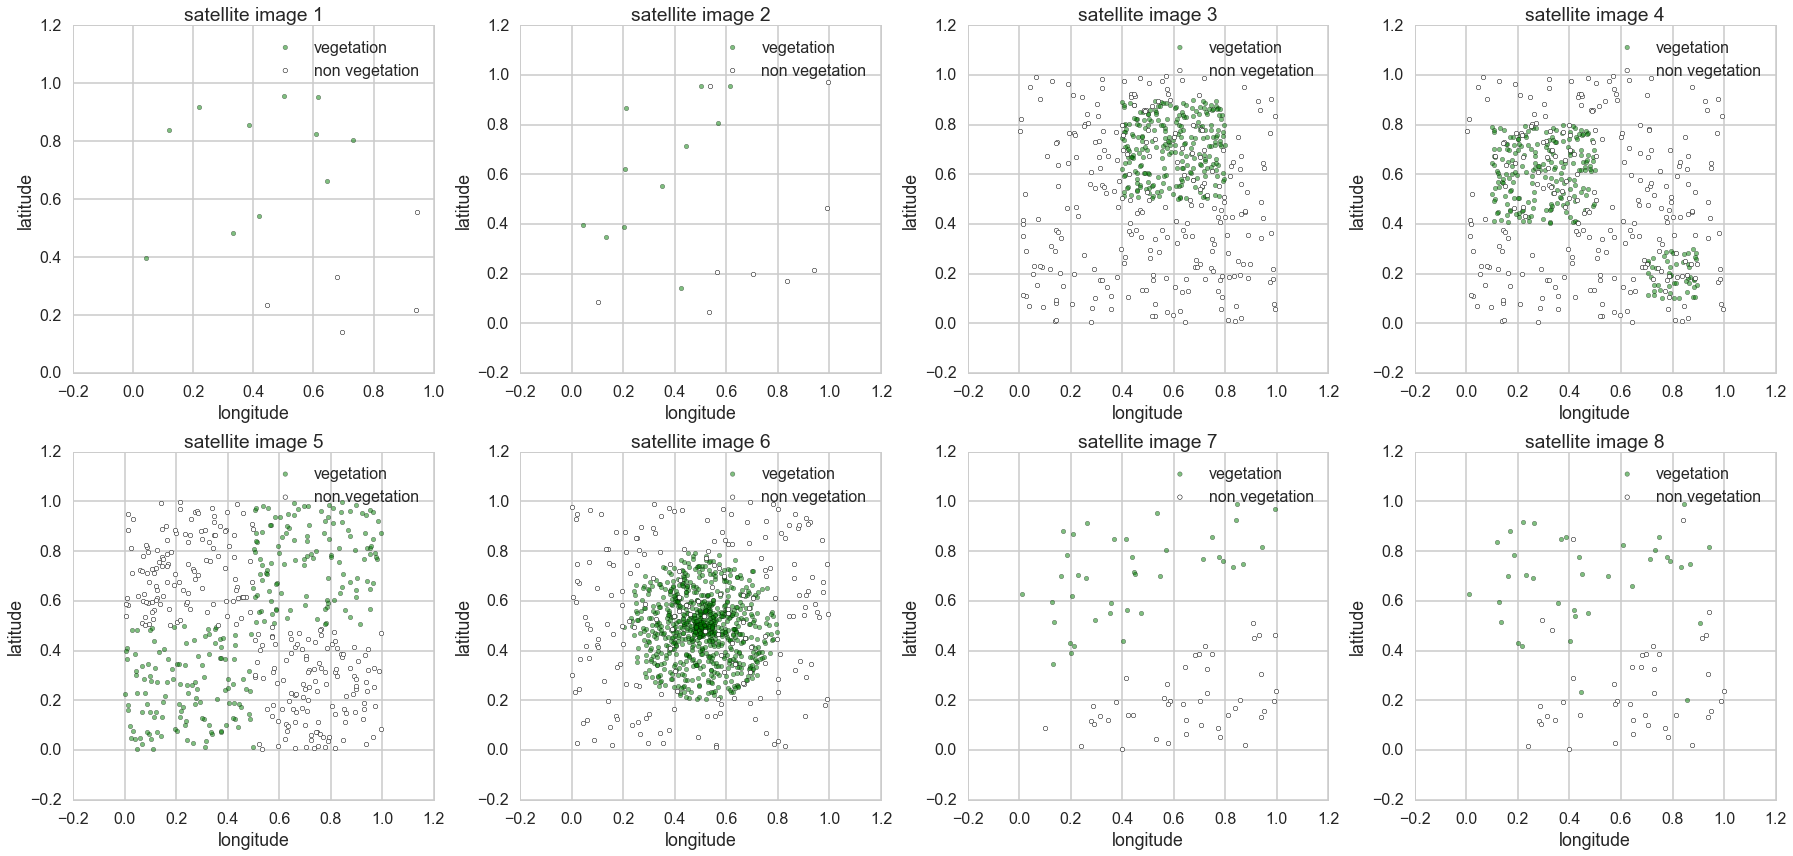

In [14]:
# Plot the data in each dataframe as a subplot of a single figure
# ----------------------------------------------------------------

fig, ax = plt.subplots(2, 4, figsize=(25, 12))

#Iterate through images/dataframes
for i in range(len(sat_images)):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]
    
    if i > 3:
        m , n = 1 , i - 4
    else:
        m , n = 0 ,  i
    
    #Plot vegetation locations as green dots
    ax[m,n].scatter(x[y == 1, 0], x[y == 1, 1], c='green', label='vegetation', alpha = 0.5)
    #Plot non-vegetation locations as white dots
    ax[m,n].scatter(x[y == 0, 0], x[y == 0, 1], c='white', label='non vegetation')
    
    #Label everything
    ax[m,n].set_xlabel('longitude')
    ax[m,n].set_ylabel('latitude')
    ax[m,n].set_title('satellite image {}'.format(i + 1))
    ax[m,n].legend(loc = 'best')
    
plt.tight_layout()
plt.show() 

<br>

**2. Visualize Decision Boundaries:**


<br>

## Problem 2 (Optional): Classification Competition

This problem will involve an class-wide model building competition, where you will compete with each other in building a prediction model for cancer diagnosis. The results will be displayed live on a public leaderboard. The competition begins on Nov 9th, 3:00pm, and end on Nov 16th, 11:59pm. 

Please access the following link for all relevant details (data set, submission instructions, evaluation metric, leader board, etc.):
https://inclass.kaggle.com/c/harvard-data-science-course-competition

**Reward:** The top 20% of students on the leaderboard will each receive one bonus point to apply to an homework score of their choice (meaning you can turn a homework score of 2 to a 3, 3 to a 4, 5 to a 6 etc).

---

## Challenge Problem: Meta Learning

In the problem, you are provided with 10 different previously trained prediction models for a spam classification task. The task is to investigate how can one combine these models into a single meta classification model (without retraining the individual models) that performs better than each of the individual ones? 

The data for this problem is provided in the files `dataset_5_train.txt` and `dataset_5_test.txt`. Each row of these files is an email described by 57 attributes, and the last column is 1 if the email is spam, and 0 otherwise. 

The prediction models are provided in the file `models.npy` and can be loaded into an array by executing: 

`models = np.load('models.npy')`

As before, you can make predictions using the $i^\text{th}$ using:

`model[i].predict(x_test)` 

and score the model using:

`model[i].score(x_test, y_test)`

The baseline for this task is a simple combination strategy that takes a majority vote from the individual prediction models.

**Any reasonable model that performs better than the baseline model on the test set will receive full credit.**

There are many intuitive ways to combine these 10 models into one; a more sophisticated approach is called "mixture of experts". In this problem, we are not requiring you to implement any particular approach.

---